## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import defaultdict

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [4]:
# Add path to book code
import os
import sys

sys.path.append( os.path.join( '.', 'original', 'code') )

In [5]:
from original.code import nsfg

## Data Source

In [6]:
df_orig = nsfg.ReadFemPreg('original/code/2002FemPreg.dct', 'original/code/2002FemPreg.dat.gz')
print(f'Shape : {df_orig.shape}')
df_orig.head()

Shape : (13593, 244)


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


#### Elements of Statistical Analysis
1. Data Collection
2. Descriptive Statistics
3. Exploratory Data Analysis
4. Estimation
5. Hypothesis Testing

#### Types of Studies
* Cross-sectional study
* Longitudinal study

#### Important Terms
* Recodes

## Data Analysis

In [7]:
# Focus on relevant columns
relevant_cols = ['caseid', 'prglngth', 'outcome', 'pregordr', 'birthord', 'birthwgt_lb', 'birthwgt_oz', 'agepreg', 'finalwgt']
df = df_orig.loc[:, relevant_cols]  # Not using loc here will lead to SettingWithCopyWarning
                                    # since pandas will not be able to ascertain if df is a view or a copy
print(f'Shape: {df.shape}')
df.head()

Shape: (13593, 9)


,caseid,prglngth,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,finalwgt
0,1,39,1,1,1.0,8.0,13.0,33.16,6448.271112
1,1,39,1,2,2.0,7.0,14.0,39.25,6448.271112
2,2,39,1,1,1.0,9.0,2.0,14.33,12999.542264
3,2,39,1,2,2.0,7.0,0.0,17.83,12999.542264
4,2,39,1,3,3.0,6.0,3.0,18.33,12999.542264


In [8]:
# Calculate total weight
df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0
df.head()

,caseid,prglngth,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,finalwgt,totalwgt_lb
0,1,39,1,1,1.0,8.0,13.0,33.16,6448.271112,8.8125
1,1,39,1,2,2.0,7.0,14.0,39.25,6448.271112,7.8750
2,2,39,1,1,1.0,9.0,2.0,14.33,12999.542264,9.1250
3,2,39,1,2,2.0,7.0,0.0,17.83,12999.542264,7.0000
4,2,39,1,3,3.0,6.0,3.0,18.33,12999.542264,6.1875


### Validation

In [9]:
# Check the outcomes, and match with published data
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [10]:
# Check birth weights with published data
df.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

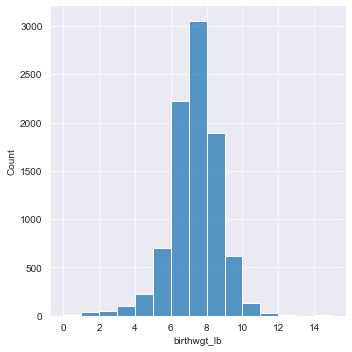

In [11]:
# Visualize Distribution
sns.displot(df.birthwgt_lb, bins=15);

In [12]:
# Map caseid to indices
pregmap = defaultdict( list )
for idx, caseid in df.caseid.iteritems():
    pregmap[caseid].append(idx)

In [13]:
# Find all outcomes for one caseid
caseid = 10229
idx = pregmap[caseid]
df.outcome[idx].values

array([4, 4, 4, 4, 4, 4, 1])

In [14]:
# Do the the above directly in pandas
df[df.caseid == caseid].outcome.values

array([4, 4, 4, 4, 4, 4, 1])

## Exercises

1. Select the birthord column, print the value counts, and compare to results published in the codebook

In [15]:
df.birthord.value_counts()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

In [16]:
# Number of nulls
df.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [17]:
prglngth_counts = df.prglngth.value_counts().sort_index()
print(f'13 weeks or less : {prglngth_counts[:14].sum()}')
print(f'14-26 weeks : {prglngth_counts[14:27].sum()}')
print(f'27 weeks or longer : {prglngth_counts[27:].sum()}')

13 weeks or less : 3522
14-26 weeks : 793
27 weeks or longer : 9278


Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [18]:
df['totalwgt_kg'] = df.totalwgt_lb * 0.45
print(f'Mean weight is {df.totalwgt_kg.mean():.2f} kgs')

Mean weight is 3.27 kgs


`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [19]:
resp = nsfg.ReadFemResp('original/code/2002FemResp.dct', 
                        'original/code/2002FemResp.dat.gz')

Select the age_r column from resp and print the value counts. How old are the youngest and oldest respondents?

In [20]:
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

How old is the respondent with `caseid` 1?

In [21]:
resp[resp.caseid == 1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [22]:
df[df.caseid == 2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [23]:
df[df.caseid==5012].totalwgt_lb

5515    6.0
Name: totalwgt_lb, dtype: float64